In [23]:
import pandas as pd
import numpy as np
df_3=pd.DataFrame(pd.read_csv("emissions_by_country_preprocessed_3.csv"))
import matplotlib.pyplot as plt
df_3

,Country,ISO 3166-1 alpha-3,Total,Coal,Oil,Cement,Flaring,Other,Per Capita,Country_num,ISO 3166-1 alpha-3_num
0,Afghanistan,Afg,0.00,127.39,153.48,62.6,56.07,849.4,121.570000,0,1
1,Afghanistan,Afg,0.00,127.39,153.48,62.6,56.07,849.4,121.570000,0,1
2,Afghanistan,Afg,0.00,127.39,153.48,62.6,56.07,849.4,121.570000,0,1
3,Afghanistan,Afg,0.00,127.39,153.48,62.6,56.07,849.4,121.570000,0,1
4,Afghanistan,Afg,0.00,127.39,153.48,62.6,56.07,849.4,121.570000,0,1
...,...,...,...,...,...,...,...,...,...,...,...
63099,Global,Wld,73.68,127.39,153.48,62.6,56.07,849.4,4.749682,79,217
63100,Global,Wld,73.68,127.39,153.48,62.6,56.07,849.4,4.792753,79,217
63101,Global,Wld,73.68,127.39,153.48,62.6,56.07,849.4,4.775633,79,217
63102,Global,Wld,73.68,127.39,153.48,62.6,56.07,849.4,4.497423,79,217


In [24]:

df_3o = pd.get_dummies(df_3, columns=['ISO 3166-1 alpha-3_num'], dtype=int)
df_3o


,Country,ISO 3166-1 alpha-3,Total,Coal,Oil,Cement,Flaring,Other,Per Capita,Country_num,...,ISO 3166-1 alpha-3_num_215,ISO 3166-1 alpha-3_num_216,ISO 3166-1 alpha-3_num_217,ISO 3166-1 alpha-3_num_218,ISO 3166-1 alpha-3_num_219,ISO 3166-1 alpha-3_num_220,ISO 3166-1 alpha-3_num_221,ISO 3166-1 alpha-3_num_222,ISO 3166-1 alpha-3_num_223,ISO 3166-1 alpha-3_num_224
0,Afghanistan,Afg,0.00,127.39,153.48,62.6,56.07,849.4,121.570000,0,...,0,0,0,0,0,0,0,0,0,0
1,Afghanistan,Afg,0.00,127.39,153.48,62.6,56.07,849.4,121.570000,0,...,0,0,0,0,0,0,0,0,0,0
2,Afghanistan,Afg,0.00,127.39,153.48,62.6,56.07,849.4,121.570000,0,...,0,0,0,0,0,0,0,0,0,0
3,Afghanistan,Afg,0.00,127.39,153.48,62.6,56.07,849.4,121.570000,0,...,0,0,0,0,0,0,0,0,0,0
4,Afghanistan,Afg,0.00,127.39,153.48,62.6,56.07,849.4,121.570000,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63099,Global,Wld,73.68,127.39,153.48,62.6,56.07,849.4,4.749682,79,...,0,0,1,0,0,0,0,0,0,0
63100,Global,Wld,73.68,127.39,153.48,62.6,56.07,849.4,4.792753,79,...,0,0,1,0,0,0,0,0,0,0
63101,Global,Wld,73.68,127.39,153.48,62.6,56.07,849.4,4.775633,79,...,0,0,1,0,0,0,0,0,0,0
63102,Global,Wld,73.68,127.39,153.48,62.6,56.07,849.4,4.497423,79,...,0,0,1,0,0,0,0,0,0,0


In [25]:


Y = df_3o['Country_num'].values.reshape(-1, 1)
X = df_3o.drop(columns=['Country', 'ISO 3166-1 alpha-3','Country_num']).values  # Keep ISO 3166-1 alpha-3_num

# Step 3: Data Preparation - Split dataset into training (80%) and testing (20%) sets
np.random.seed(42)
indices = np.random.permutation(X.shape[0])
train_size = int(0.8 * X.shape[0])

train_indices = indices[:train_size]
test_indices = indices[train_size:]

X_train = X[train_indices]
Y_train = Y[train_indices]
X_test = X[test_indices]
Y_test = Y[test_indices]

# Print shapes of X_train, Y_train, X_test, Y_test
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

X_train_mean = np.mean(X_train, axis=0)
X_train_std = np.std(X_train, axis=0)

# Normalize training and testing data
X_train_normalized = (X_train - X_train_mean) / X_train_std
X_test_normalized = (X_test - X_train_mean) / X_train_std

X_train shape: (50483, 232)
Y_train shape: (50483, 1)
X_test shape: (12621, 232)
Y_test shape: (12621, 1)


In [26]:
def calculate_ols_weights(X, Y):
    ols_w=np.linalg.inv(X.T @ X) @ (X.T @ Y)
    return ols_w

def predict(X, W):
    return X @ W

# Calculate Mean Squared Error (MSE)
def mean_squared_error(Y_true, Y_pred):
    mse=np.mean((Y_true - Y_pred) ** 2)
    return mse

# OLS weights
W_ols = calculate_ols_weights(X_train_normalized, Y_train)

# Predictions for OLS
Y_train_predicted_ols = predict(X_train_normalized, W_ols)
Y_test_predicted_ols = predict(X_test_normalized, W_ols)

# Calculate MSE for OLS
train_mse_ols = mean_squared_error(Y_train, Y_train_predicted_ols)
test_mse_ols = mean_squared_error(Y_test, Y_test_predicted_ols)

print(f" Trained Mean Squared Error (OLS): {train_mse_ols}")
print(f"Test Mean Squared Error (OLS): {test_mse_ols}")

 Trained Mean Squared Error (OLS): 334.79609976854084
Test Mean Squared Error (OLS): 336.32717610562037


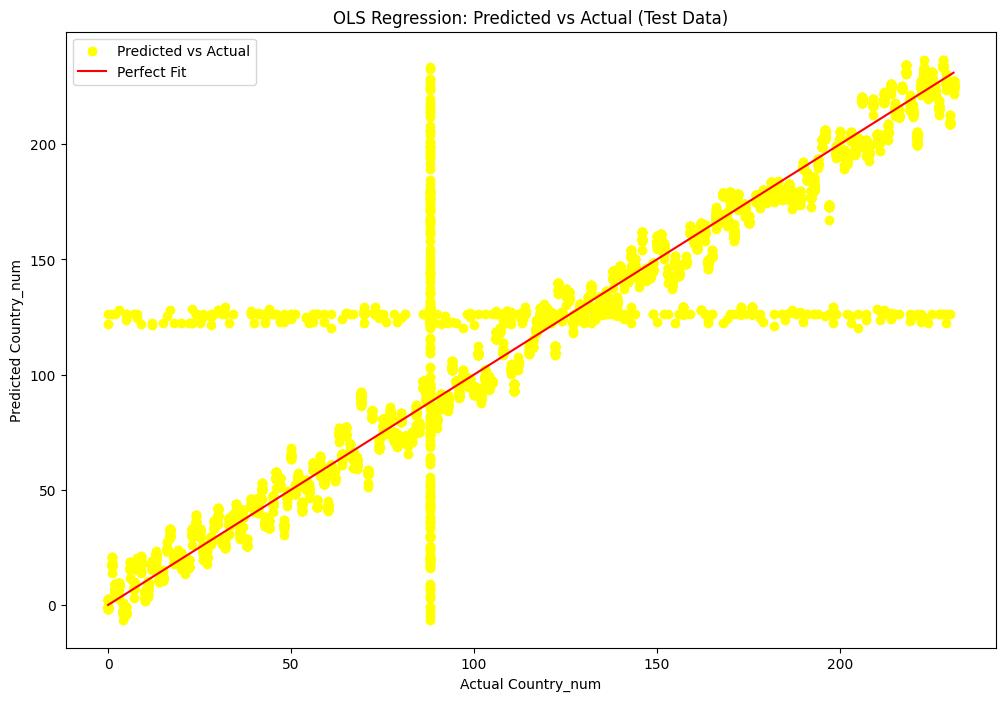

In [27]:
plt.figure(figsize=(12, 8))
plt.scatter(Y_test, Y_test_predicted_ols, color='yellow', label='Predicted vs Actual')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', label='Perfect Fit')
plt.title("OLS Regression: Predicted vs Actual (Test Data)")
plt.xlabel("Actual Country_num")
plt.ylabel("Predicted Country_num")
plt.legend()
plt.show()

In [28]:
def calculate_ridge_weights(X, Y, lambda_value):
    I = np.eye(X.shape[1])
    ridge_w =np.linalg.inv(X.T @ X + lambda_value * I) @ (X.T @ Y)
    return ridge_w

# Set a regularization parameter lambda for Ridge Regression
lambda_v= 1.0

# Calculate Ridge Regression weights
W_ridge = calculate_ridge_weights(X_train_normalized, Y_train, lambda_v)

# Predictions for Ridge Regression
Y_train_prediction_ridge = predict(X_train_normalized, W_ridge)
Y_test_prediction_ridge = predict(X_test_normalized, W_ridge)

# Calculate MSE for Ridge Regression
train_mse_ridge = mean_squared_error(Y_train, Y_train_prediction_ridge)
test_mse_ridge = mean_squared_error(Y_test, Y_test_prediction_ridge)

print(f"Train MSE (Ridge): {train_mse_ridge}")
print(f"Test MSE (Ridge): {test_mse_ridge}")

Train MSE (Ridge): 278.7561464578468
Test MSE (Ridge): 281.2268465282478


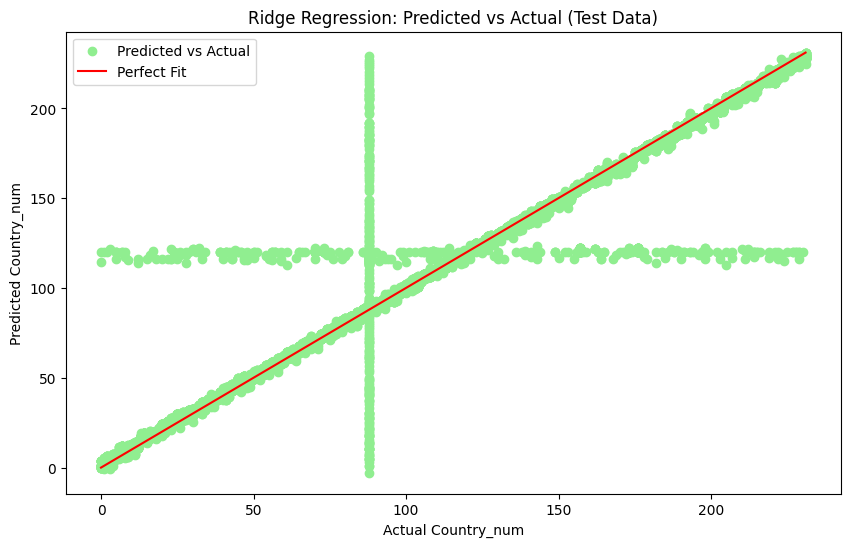

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_test_prediction_ridge, color='lightgreen', label='Predicted vs Actual')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', label='Perfect Fit')  # Diagonal line for reference
plt.title("Ridge Regression: Predicted vs Actual (Test Data)")
plt.xlabel("Actual Country_num")
plt.ylabel("Predicted Country_num")
plt.legend()
plt.show()

In [32]:
print(W_ridge)

[[-1.56089421e+00]
 [ 1.44026929e+00]
 [-7.23133866e-01]
 [-7.45609024e-01]
 [-7.95769126e-01]
 [ 1.14747603e+02]
 [-3.70013629e-01]
 [-6.60709644e+00]
 [-7.30074318e+00]
 [-7.04997925e+00]
 [-6.90759463e+00]
 [-7.25672444e+00]
 [-7.27771366e+00]
 [ 6.64052156e+00]
 [-6.89182269e+00]
 [-6.76912575e+00]
 [-6.90156247e+00]
 [-6.61534755e+00]
 [-6.65734316e+00]
 [-6.54290763e+00]
 [-6.19377315e+00]
 [-5.27587339e+00]
 [-6.08563551e+00]
 [-5.95368637e+00]
 [-5.53818208e+00]
 [-5.33205433e+00]
 [-6.22906327e+00]
 [-5.25522652e+00]
 [-6.58523895e+00]
 [-6.37489567e+00]
 [-5.54341818e+00]
 [-6.09917250e+00]
 [-5.81718284e+00]
 [-5.96480154e+00]
 [-5.84256874e+00]
 [-5.46097129e+00]
 [-6.10160957e+00]
 [-5.40744221e+00]
 [-5.80534574e+00]
 [-5.61488679e+00]
 [-4.94600136e+00]
 [-4.92976041e+00]
 [ 5.46505274e+00]
 [-4.67601053e+00]
 [-4.42476714e+00]
 [-4.06335846e+00]
 [-5.20981927e+00]
 [-3.96335726e+00]
 [-4.35769076e+00]
 [-4.38313595e+00]
 [-4.39490151e+00]
 [-4.56694778e+00]
 [-5.0542262

In [33]:
import pickle
with open('best_ridge_regression_model_emissions_by_country.pkl', 'wb') as file:
    pickle.dump({
        'weights': W_ridge,
    }, file)

print("Best model saved as 'best_ridge_regression_model_emissions_by_country.pkl'")

Best model saved as 'best_ridge_regression_model_emissions_by_country.pkl'


In [35]:
import pickle
with open('best_ridge_regression_model_emissions_by_country.pkl', 'rb') as file:
        model_data = pickle.load(file)
print("Best Model details:")
print("weights :",model_data['weights'])


Best Model details:
weights : [[-1.56089421e+00]
 [ 1.44026929e+00]
 [-7.23133866e-01]
 [-7.45609024e-01]
 [-7.95769126e-01]
 [ 1.14747603e+02]
 [-3.70013629e-01]
 [-6.60709644e+00]
 [-7.30074318e+00]
 [-7.04997925e+00]
 [-6.90759463e+00]
 [-7.25672444e+00]
 [-7.27771366e+00]
 [ 6.64052156e+00]
 [-6.89182269e+00]
 [-6.76912575e+00]
 [-6.90156247e+00]
 [-6.61534755e+00]
 [-6.65734316e+00]
 [-6.54290763e+00]
 [-6.19377315e+00]
 [-5.27587339e+00]
 [-6.08563551e+00]
 [-5.95368637e+00]
 [-5.53818208e+00]
 [-5.33205433e+00]
 [-6.22906327e+00]
 [-5.25522652e+00]
 [-6.58523895e+00]
 [-6.37489567e+00]
 [-5.54341818e+00]
 [-6.09917250e+00]
 [-5.81718284e+00]
 [-5.96480154e+00]
 [-5.84256874e+00]
 [-5.46097129e+00]
 [-6.10160957e+00]
 [-5.40744221e+00]
 [-5.80534574e+00]
 [-5.61488679e+00]
 [-4.94600136e+00]
 [-4.92976041e+00]
 [ 5.46505274e+00]
 [-4.67601053e+00]
 [-4.42476714e+00]
 [-4.06335846e+00]
 [-5.20981927e+00]
 [-3.96335726e+00]
 [-4.35769076e+00]
 [-4.38313595e+00]
 [-4.39490151e+00]
 